# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [1]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.
4423680/4422102 [==============================] - 2s 0us/step


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [4]:
import matplotlib.pyplot as plt

&lt;matplotlib.image.AxesImage at 0x2524e9f1390&gt;

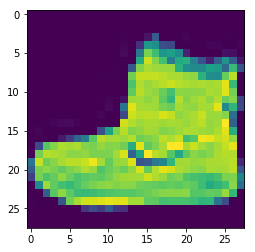

In [5]:
single_image = x_train[0]
plt.imshow(single_image)

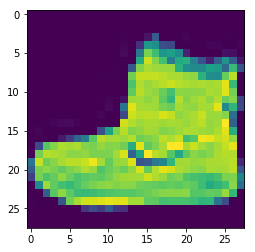

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [6]:
x_train.max()

255

In [7]:
x_train = x_train/255
x_test = x_test/255

In [10]:
scaled_single = x_train[0]

&lt;matplotlib.image.AxesImage at 0x2524d105710&gt;

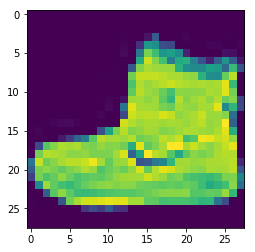

In [11]:
plt.imshow(scaled_single)

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_test.shape

(10000, 28, 28)

In [40]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [41]:
x_train.shape

(60000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [16]:
from keras.utils import to_categorical
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [17]:
y_cat_test.shape

(10000, 10)

In [18]:
y_cat_train.shape

(60000, 10)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [29]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [42]:
model.fit(x_train,y_cat_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 28s 463us/step - loss: 0.4086 - acc: 0.8540
Epoch 2/10
60000/60000 [==============================] - 30s 492us/step - loss: 0.2782 - acc: 0.9000
Epoch 3/10
60000/60000 [==============================] - 33s 542us/step - loss: 0.2404 - acc: 0.9138
Epoch 4/10
60000/60000 [==============================] - 27s 455us/step - loss: 0.2151 - acc: 0.9228
Epoch 5/10
60000/60000 [==============================] - 27s 453us/step - loss: 0.1963 - acc: 0.9302
Epoch 6/10
60000/60000 [==============================] - 27s 454us/step - loss: 0.1817 - acc: 0.9346
Epoch 7/10
60000/60000 [==============================] - 28s 465us/step - loss: 0.1695 - acc: 0.9399
Epoch 8/10
60000/60000 [==============================] - 31s 514us/step - loss: 0.1604 - acc: 0.9428
Epoch 9/10
60000/60000 [==============================] - 27s 457us/step - loss: 0.1523 - acc: 0.9471
Epoch 10/10
60000/60000 [==============================] - 28s 465us/step - loss: 

&lt;keras.callbacks.History at 0x252022d2e48&gt;

Epoch 1/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1802 - acc: 0.9365
Epoch 2/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1679 - acc: 0.9395
Epoch 3/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.1579 - acc: 0.9439
Epoch 4/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1502 - acc: 0.9469
Epoch 5/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1427 - acc: 0.9496
Epoch 6/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1397 - acc: 0.9523
Epoch 7/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1312 - acc: 0.9551
Epoch 8/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1274 - acc: 0.9559
Epoch 9/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1238 - acc: 0.9582
Epoch 10/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1201 - acc: 0.9588

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [43]:
model.metrics_names

[&#39;loss&#39;, &#39;acc&#39;]

['loss', 'acc']

In [44]:
model.evaluate(x_test, y_cat_test)

10000/10000 [==============================] - 2s 194us/step


[0.32625588502287867, 0.9056]

In [45]:
from sklearn.metrics import classification_report

In [46]:
predictions = model.predict_classes(x_test)

In [47]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.82      0.88      0.85      1000
          1       0.99      0.98      0.98      1000
          2       0.81      0.90      0.85      1000
          3       0.94      0.88      0.91      1000
          4       0.81      0.90      0.85      1000
          5       0.99      0.97      0.98      1000
          6       0.85      0.65      0.73      1000
          7       0.95      0.97      0.96      1000
          8       0.97      0.98      0.98      1000
          9       0.96      0.97      0.96      1000

avg / total       0.91      0.91      0.90     10000



             precision    recall  f1-score   support

          0       0.86      0.85      0.85      1000
          1       0.99      0.97      0.98      1000
          2       0.88      0.83      0.85      1000
          3       0.91      0.91      0.91      1000
          4       0.83      0.88      0.85      1000
          5       0.97      0.98      0.98      1000
          6       0.73      0.76      0.74      1000
          7       0.95      0.97      0.96      1000
          8       0.99      0.97      0.98      1000
          9       0.98      0.94      0.96      1000

avg / total       0.91      0.91      0.91     10000



# Great Job!